### Date your Mate ! 

Candid from the Speed Dating Event

<img src="/home/jasp/sem_2/cpsc/project/dateyourmate/speed_dating.jpg">

#### Description 

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.


#### Data Exploration tasks

<ul>
<li>What are the least desirable attributes in a male partner? Does this differ for female partners?</li><br>
<li>How important do people think attractiveness is in potential mate selection vs. its real impact?</li><br>
<li>Are shared interests more important than a shared racial background?</li><br>
<li>Can people accurately predict their own perceived value in the dating market?</li><br>
<li>In terms of getting a second date, is it better to be someone's first speed date of the night or their last?</li><br>
</ul>

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the dataset

In [3]:
#checking the directory for the list of files
!ls -l

total 6040
-rw-r--r-- 1 jasp jasp  617229 Mar 19 17:59  dateyourmate.ipynb
-rw-r--r-- 1 jasp jasp     290 Mar 10 22:56  README.md
-rw-r--r-- 1 jasp jasp 5192296 Mar 10 22:56 'Speed Dating Data.csv'
-rw-r--r-- 1 jasp jasp  161792 Mar 10 22:56 'Speed Dating Data Key.doc'
-rw-r--r-- 1 jasp jasp  200747 Mar 19 13:13  speed_dating.jpg


In [4]:
# reading the csv file
df = pd.read_csv("Speed Dating Data.csv", encoding='unicode_escape')   
# we have used encoding because there is some non-ascii character in the dictionary and it can't be encoded/decoded. 

Analysing stats of the data set

In [5]:
# checking number of rows and columns 
df.shape

(8378, 195)

In [6]:
# Making adjustment to see the complete info 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Retriving first 5 rows of the data set 
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Data Cleaning 

In [8]:
# checking for null values

#creating a series object with count of nulls
nulls = df.isna().sum()

<BarContainer object of 195 artists>

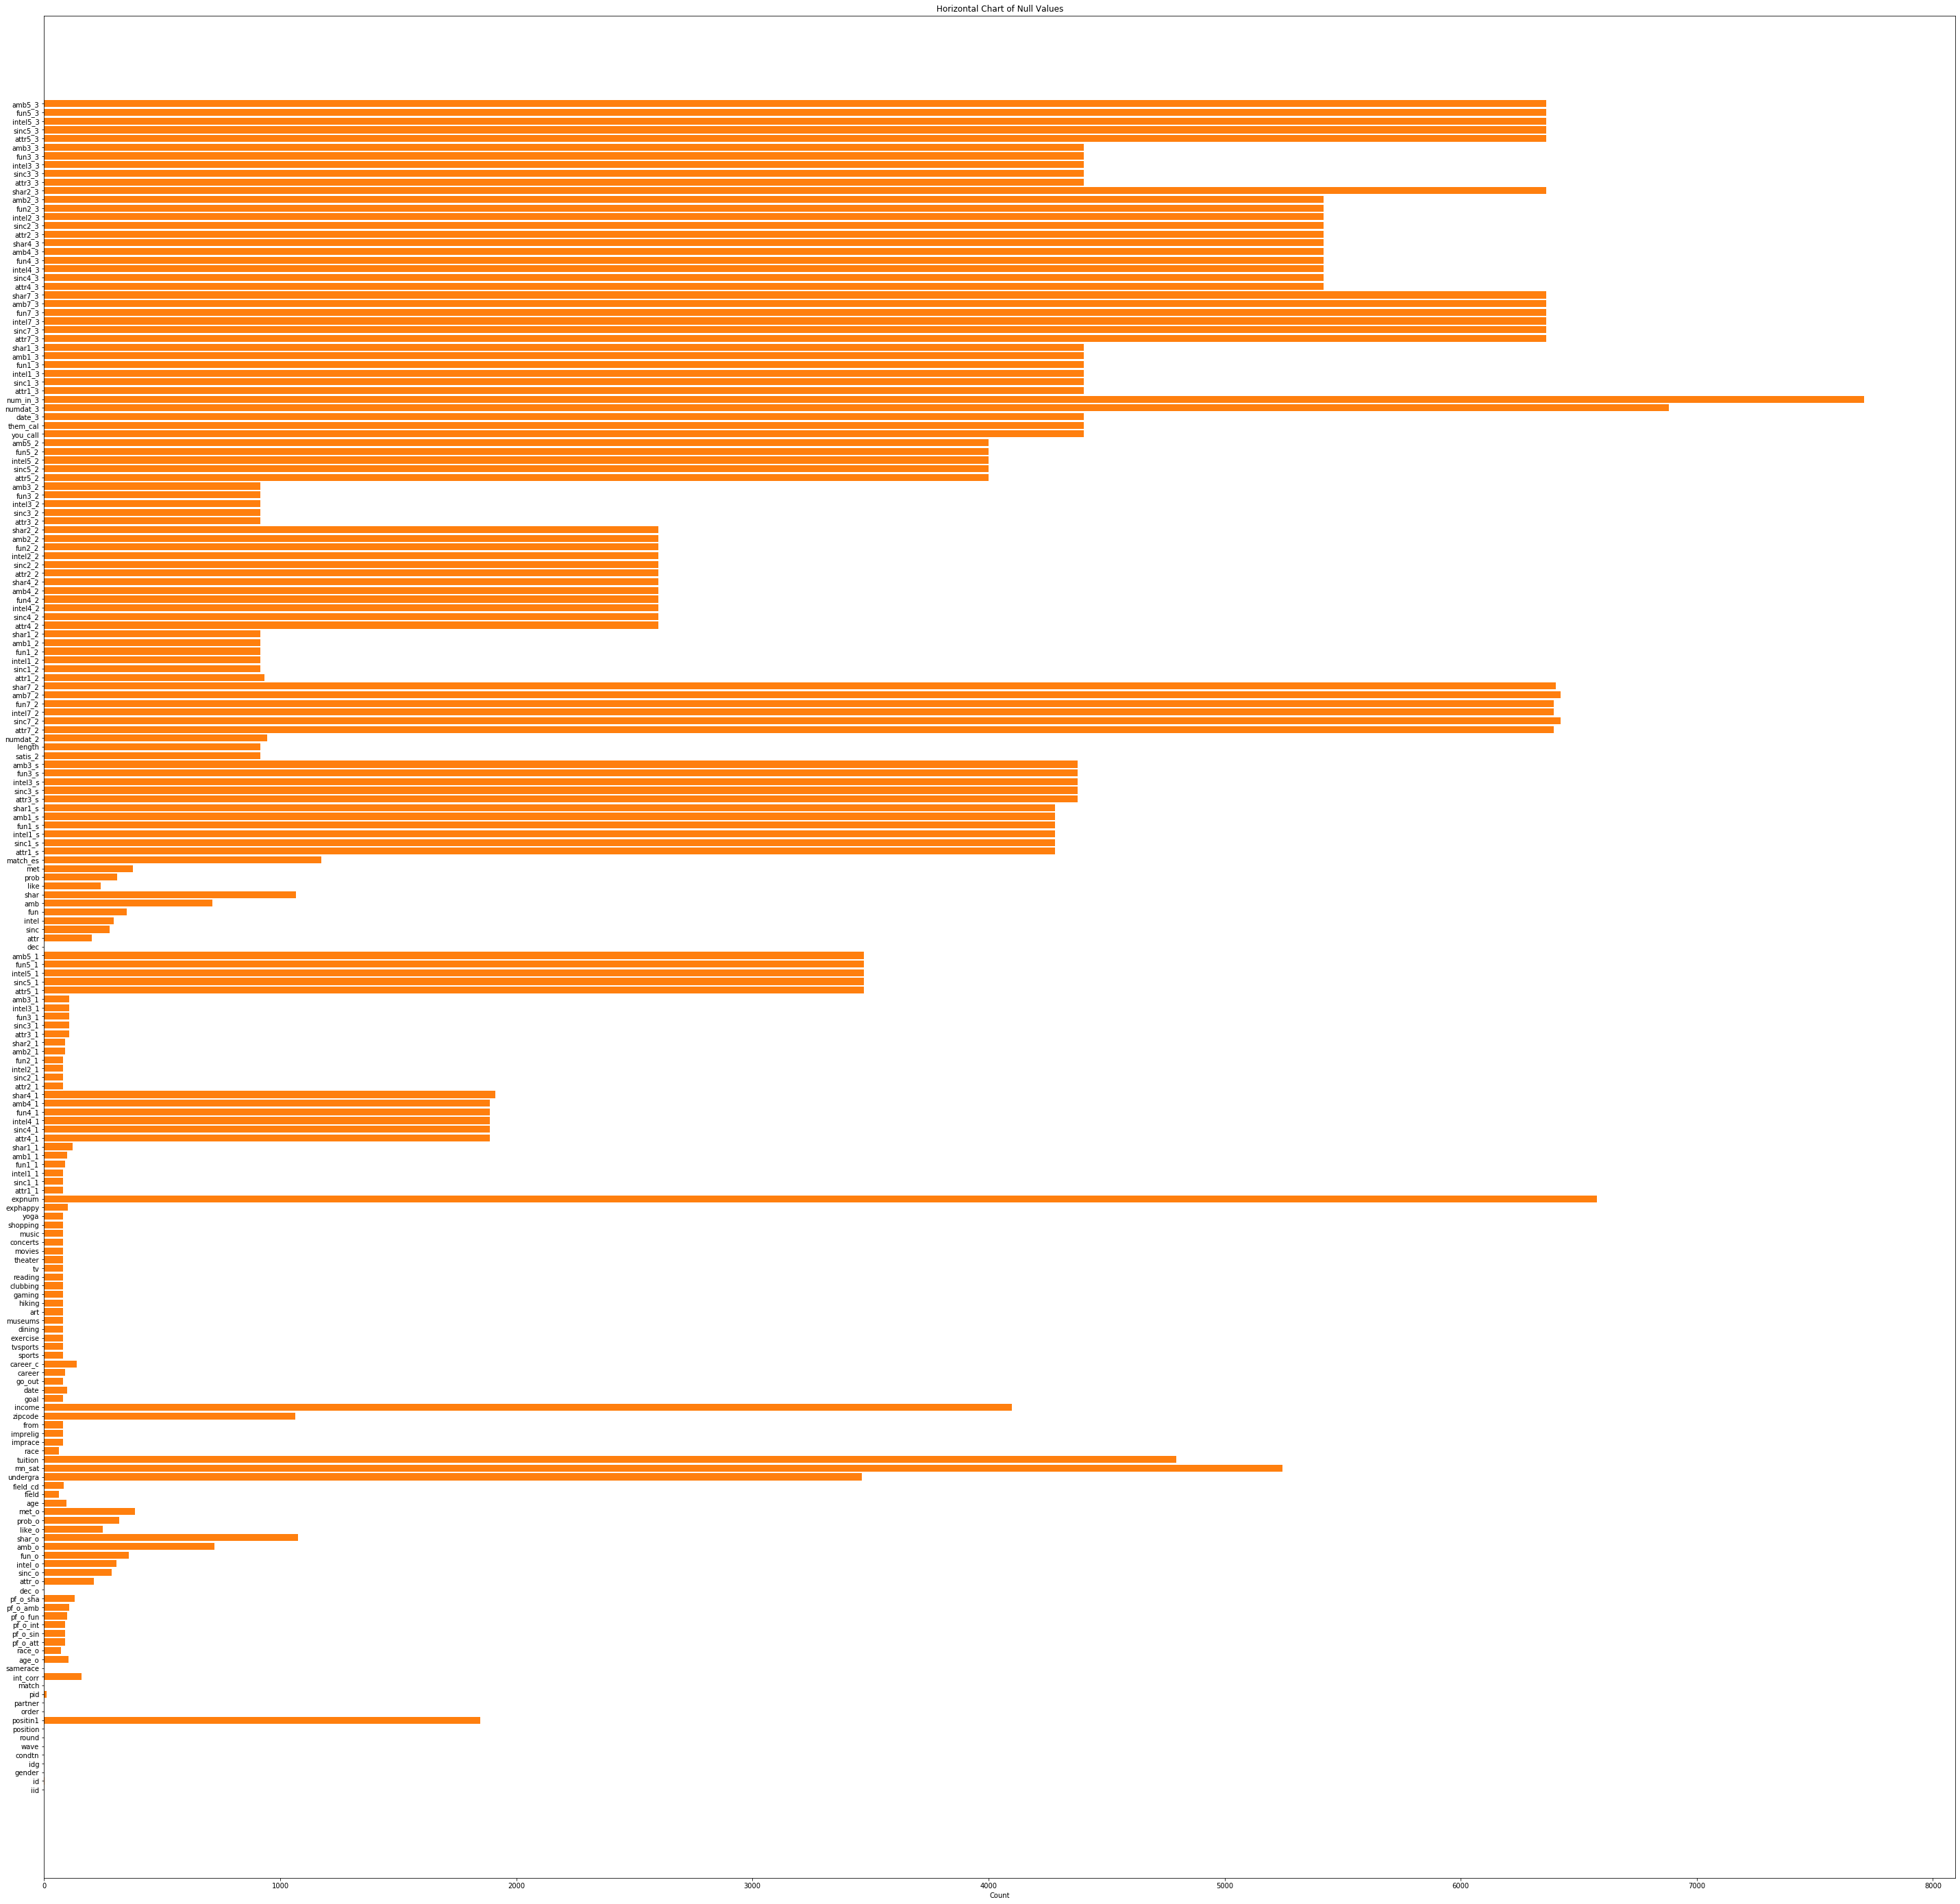

In [10]:
# Visualization of nulls in dataset

#creating a fig object with appropriate size
fig= plt.figure(1, figsize=(50, 50))
#adding one subplot
ax=fig.add_subplot(111)
#passing data
plt.barh(nulls.index,nulls)
#Naming conventionsplt.ylabel("Columns")
plt.xlabel("Count")
plt.title("Horizontal Chart of Null Values")

plt.barh(nulls.index, nulls.values)

From the peek at the data we had above, there are a ton of fields with NaNs. A lot of NaNs. There are 8,378 rows and a bunch of fields have thousands of NaNs and probably bad practice to use imputation to guess the values. Instead, I'll just disregard these fields with over 4000 null values from the dataset and narrow my analysis to the fields that I can use. First though, let's take a look at some totals before we throw out some fields and rows due to missing values.

Exploring Age Factor

/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  30.,  346., 1549., 1700., 1928., 1335.,  574.,  335.,  313.,
         105.,   24.,   18.,   20.,    0.,    0.,    0.,    0.,    0.,
           0.,    6.]),
 array([18.  , 19.85, 21.7 , 23.55, 25.4 , 27.25, 29.1 , 30.95, 32.8 ,
        34.65, 36.5 , 38.35, 40.2 , 42.05, 43.9 , 45.75, 47.6 , 49.45,
        51.3 , 53.15, 55.  ]),
 <a list of 20 Patch objects>)

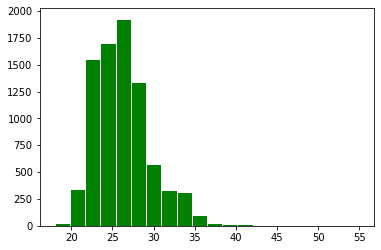

In [11]:
plt.hist(df.age,bins=20, facecolor='green', edgecolor = 'white')

 So most of the participants were in mid twenties to early thirties, let's find out the exact count

In [12]:
print((len(df.age[(df.age>25) & (df.age<35)]) / df.shape[0])*100, "% of the people are between 25 & 35")

53.533062783480545 % of the people are between 25 & 35


Let's see how many speed daters found a match 

In [13]:
temp_df_matched_count = pd.crosstab(index=df.match,columns="count")
temp_df_matched_count

col_0,count
match,
0,6998
1,1380


In [14]:
(temp_df_matched_count.iloc[1,] / df.shape[0]) * 100

col_0
count    16.471712
Name: 1, dtype: float64

Hmm' only 1380 out of 8378 lovers, which is only 16.47 %

Exploring Gender factor

In [15]:
# Cheking if there are some NA in gender 
df.gender.isna().sum()

0

In [16]:
# Checking the levels of this categorical variables 
df.gender.unique()

array([0, 1])

We only have two values , 0 - Females & 1 - Males 

In [17]:
# Checking the participation levels
df.gender.value_counts()

1    4194
0    4184
Name: gender, dtype: int64

As expected, we are having approximately equal participation !

Analysing the age and gender

In [21]:
gb = df.groupby(['gender','age']).age.count()
gb

gender  age 
0       19.0     10
        20.0     30
        21.0    183
        22.0    364
        23.0    507
        24.0    454
        25.0    455
        26.0    492
        27.0    441
        28.0    316
        29.0    227
        30.0    211
        31.0     54
        32.0     57
        33.0    125
        34.0     83
        35.0     60
        36.0     25
        38.0     19
        55.0      6
1       18.0     10
        19.0     10
        20.0     25
        21.0    108
        22.0    291
        23.0    387
        24.0    409
        25.0    382
        26.0    377
        27.0    618
        28.0    430
        29.0    362
        30.0    363
        31.0     71
        32.0    153
        33.0     36
        34.0     69
        36.0     20
        37.0      5
        39.0     18
        42.0     20
Name: age, dtype: int64

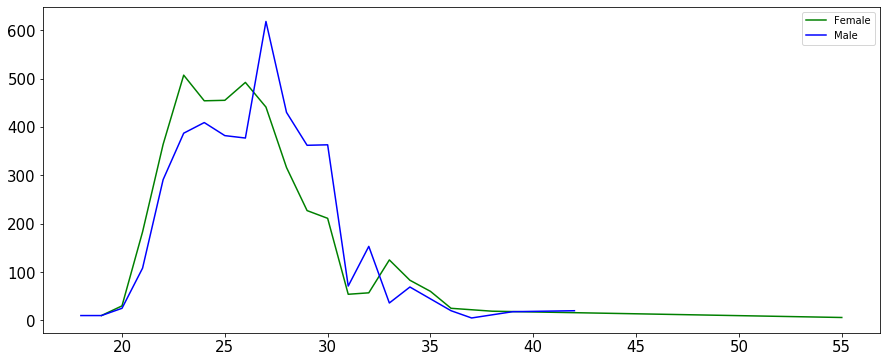

In [22]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(gb[0],'g', label = 'Female')
ax.plot(gb[1],'b',label = 'Male')
ax.legend(loc='best')

ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

This is interesting, females have started earlier and the peak for male is between 25 to 30

I wonder... how many of each gender are there and does that affect the other person's decision? That is, do women receive more positive final decisions from the other person (dec_o) than men do?

In [23]:
gb = df.groupby(['gender','dec_o']).age.count()
gb

gender  dec_o
0       0        2164
        1        1955
1       0        2652
        1        1512
Name: age, dtype: int64

In [24]:
gb[0].index

Int64Index([0, 1], dtype='int64', name='dec_o')

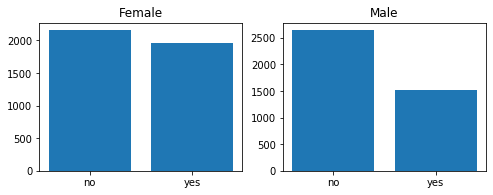

In [25]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.bar(['no','yes'],gb[0].values)
ax2.bar(['no','yes'],gb[1].values)
ax1.title.set_text("Female")
ax2.title.set_text("Male")

ax1.tick_params(axis='x', which='major', labelsize=10)
ax1.tick_params(axis='y', which='major', labelsize=10)


ax2.tick_params(axis='x', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)



It looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". Men received about 2050 'no' and about 1300 'yes'. In other words, <b>men are more likely to be rejected by women than women are to be rejected by men (wahwah)</b>. 

Broken Hearts ie people who were rejected by opposite sex, but they were interested

In [26]:
# dec is a variable which says if someone was interested , this was taken later in survey
# dec_0 is the actual variable of decision 

broken_heart = len(df[(df['dec_o']==0) & (df['dec']==1)]) + len(df[(df['dec_o']==1) & (df['dec']==0)])
(broken_heart/len(df.index))*100

51.00262592504178

So it seems <b>51% of participants unfortunately had their heart broken</b>. More than the percentage of people who got a second date!

Let's see which profession is most in demand.

In [27]:
# This time we are using pivot table for interpretation
pd.pivot_table(df[['field','dec_o']], index=["field"], aggfunc=np.sum)

,dec_o
field,
Acting,6
African-American Studies/History,2
American Studies,3
American Studies (Masters),4
Anthropology,2
Anthropology/Education,3
Applied Maths/Econs,11
Applied Physiology & Nutrition,13
Architecture,4


Here, we got to know <b>Business people and MBA's</b>  received most positive responces.

Now, I am interested in finding are scholars are good in dating, but the challenge is there are many null values, since it is not resolable to impute them will drop them off.

In [29]:
df.mn_sat.isnull().sum()

5245

In [31]:
df_new = df[df['mn_sat'].notna()]

In [34]:
df_new.mn_sat.describe()

count         3133
unique          68
top       1,400.00
freq           403
Name: mn_sat, dtype: object

In [46]:
df_new = df_new[['dec_o','mn_sat']]

In [53]:
df_new.groupby(['dec_o']).first()

,mn_sat
dec_o,
0,"1,070.00"
1,"1,070.00"


Interestingly, average score for both acceptance and rejection is same , which means in this study inteligence does not play any role.

oops, we are forgeting about religion and race, lets explore 

In [55]:
df.imprace.isna().sum()

79

In [56]:
df.imprelig.isna().sum()

79

In [87]:
df_new = df[(df['imprace'].notna()) & (df['imprelig'].notna())]

In [88]:
df_new = df_new[['imprace','imprelig','age','gender']]

In [89]:
gb = df_new.groupby(['age']).first()

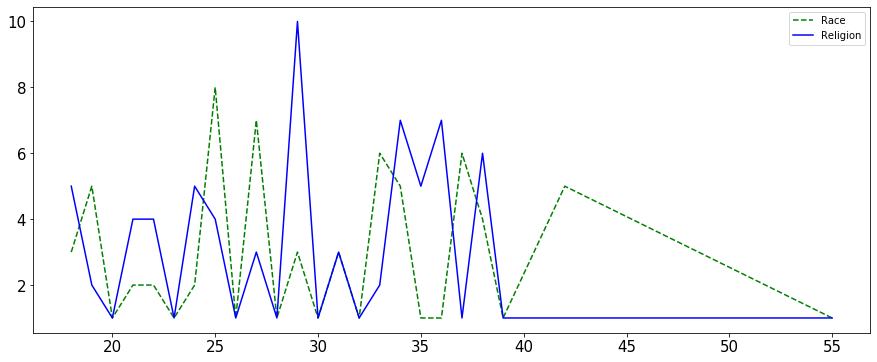

In [90]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(gb['imprace'],'g--', label = 'Race')
ax.plot(gb['imprelig'],'b',label = 'Religion')
ax.legend(loc='best')

ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

Interestingly <b>religion matters the most at the age of 27 to 30</b>, but race doesnot show any trends 

In [98]:
df_new.groupby(['gender']).first()

,imprace,imprelig,age
gender,,,
0,2.0,4.0,21.0
1,7.0,3.0,27.0


In [100]:
df_new = pd.pivot_table(df_new, index=["gender","age"], aggfunc=np.average)

In [105]:
df_new.head()

imprace  imprelig
gender age                     
0      19.0  5.000000  2.000000
       20.0  1.333333  3.000000
       21.0  5.710383  4.868852
       22.0  4.335165  4.464286
       23.0  5.074951  4.568047

In [140]:
df_new['imprelig'].loc[:]

gender  age 
0       19.0    2.000000
        20.0    3.000000
        21.0    4.868852
        22.0    4.464286
        23.0    4.568047
        24.0    4.477974
        25.0    5.158242
        26.0    3.781513
        27.0    3.979592
        28.0    3.136076
        29.0    4.819383
        30.0    3.838863
        31.0    3.296296
        32.0    3.315789
        33.0    3.208000
        34.0    4.024096
        35.0    3.466667
        36.0    6.280000
        38.0    6.000000
        55.0    1.000000
1       18.0    5.000000
        19.0    1.000000
        20.0    1.000000
        21.0    3.055556
        22.0    3.099656
        23.0    3.439276
        24.0    2.481663
        25.0    2.814136
        26.0    3.546419
        27.0    3.224919
        28.0    3.539535
        29.0    2.157459
        30.0    3.393939
        31.0    2.690141
        32.0    3.529412
        33.0    3.416667
        34.0    3.942029
        36.0    7.100000
        37.0    1.000000
        39.0

ValueError: setting an array element with a sequence.

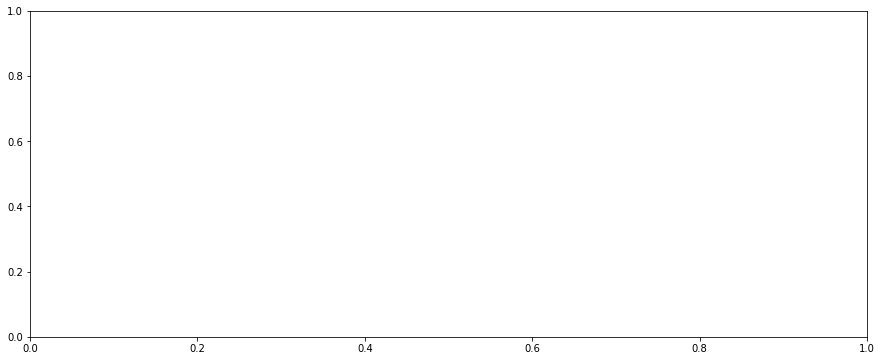

In [133]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df_new['imprelig'].loc[0, :],'g--', label = 'Race')
#ax.plot(gb['imprelig'],'b',label = 'Religion')
ax.legend(loc='best')

ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)